In [65]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [66]:
data = pd.read_csv('/Users/Parzon/Downloads/SUPPORT2_ML/Support2_ML/Untitled/support2.csv')

In [67]:
data.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

In [69]:
data.describe()

,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,7456.000000,7472.000000,9075.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,6780.000000,5733.000000,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,0.635870,0.520096,4.400000,0.195277,0.032510,0.618769,0.499679,14.582590,84.546408,12.347677,97.156711,23.330294,37.103341,239.529070,2.950520,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,0.248175,0.253343,9.126811,0.396436,0.177359,0.298367,0.304367,19.944216,27.687692,9.266329,31.559292,9.573801,1.251796,109.665593,0.875944,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,0.507690,0.342957,1.000000,0.000000,0.000000,0.500000,0.200000,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,0.715942,0.574951,1.000000,0.000000,0.000000,0.700000,0.500000,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,0.825928,0.725952,3.000000,0.000000,0.000000,0.900000,0.750000,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,0.969971,0.947998,148.000000,1.000000,1.000000,1.000000,1.000000,285.000000,195.000000,200.000000,300.000000,90.000000,41.695310,890.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [70]:
data.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'sps', 'aps', 'surv2m', 'surv6m', 'hday',
       'diabetes', 'dementia', 'ca', 'prg2m', 'prg6m', 'dnr', 'dnrday',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [71]:
data.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


In [84]:
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    elif df[column].nunique() >= 10:
         mean = df[column].mean() # mean
         std_dev = df[column].std() # standard deviation
         # Calculate interquartile range (IQR)
         q1 = df[column].quantile(0.25)
         q3 = df[column].quantile(0.75)
         iqr = q3 - q1 # interquartile range
         outlier_range = (q1 - 3*iqr, q3 + 3*iqr) # outlier range is 3 times of IQR
         outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
         outliers = outliers[column].values # outlier values

         print(f"Mean of {column}: {mean:.2f}")
         print(f"Standard deviation of {column}: {std_dev:.2f}")
         print(f"Number of outliers in {column}: {len(outliers)}")
         print("Outliers values:")
         print(outliers)

         plt.figure(figsize=(8, 6))
         sns.boxplot(data=df, x=column)
         plt.title(f"Box plot of {column}") # Box plot
         
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
         plt.title(f"Histogram of {column}")
         plt.show()
    else:
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True) # Histogram
        plt.title(f"Histogram of {column}")
        plt.show()

In [85]:
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

# Data Dictionary:

age: Age of the individual.

death: Indicator if death occurred (binary).

sex: Gender of the individual.

hospdead: Hospital death indicator (binary).

slos: Hospital stay length in days.

d.time: Days from ICU admission to death or last follow-up.

dzgroup: Diagnostic group.

dzclass: Diagnostic class.

num.co: Number of complications.

edu: Highest education level attained.

income: Income category of the individual.

scoma: Glasgow coma scale score.

charges: Total charges.

totcst: Total cost.

totmcst: Total Medicaid cost.

avtisst: Average total illness severity score.

race: Race of the individual.

sps: Simplified Acute Physiology Score.

aps: Acute Physiology Score.

surv2m: Survival probability to 2 months.

surv6m: Survival probability to 6 months.

hday: Hospital day of ICU admission.

diabetes: Indicator for diabetes (binary).

dementia: Indicator for dementia (binary).

ca: Cancer type.

prg2m: Probability of survival to 2 months.

prg6m: Probability of survival to 6 months.

dnr: Do-Not-Resuscitate status.

dnrday: Day of DNR order since ICU admission.

meanbp: Mean blood pressure.

wblc: White blood cell count.

hrt: Heart rate.

resp: Respiratory rate.

temp: Body temperature.

pafi: PaO2/FiO2 ratio (lung disease severity).

alb: Albumin levels (liver or kidney function).

bili: Bilirubin levels (liver function).

crea: Creatinine levels (kidney function).

sod: Blood sodium levels.

ph: Blood pH level (acid-base balance).

glucose: Blood glucose level.

bun: Blood Urea Nitrogen level (kidney function).

urine: Urine output (kidney function).

adlp: Activities of daily living - physical capability.

adls: Activities of daily living - scale measurement.

sfdm2: Survival function to 2 months.

adlsc: Activities of daily living scale composite.

In [74]:
metadata(data)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,age,float64,0,0.00,7323,80.43,18.041990,1.018480e+02,15.593710
1,death,int64,0,0.00,2,0.02,0.000000,1.000000e+00,0.466094
2,sex,object,0,0.00,2,0.02,NaN,NaN,NaN
3,hospdead,int64,0,0.00,2,0.02,0.000000,1.000000e+00,0.438219
4,slos,int64,0,0.00,167,1.83,3.000000,3.430000e+02,22.006440
5,d.time,int64,0,0.00,1724,18.93,3.000000,2.029000e+03,560.383272
6,dzgroup,object,0,0.00,8,0.09,NaN,NaN,NaN
7,dzclass,object,0,0.00,4,0.04,NaN,NaN,NaN
8,num.co,int64,0,0.00,10,0.11,0.000000,9.000000e+00,1.344409
9,edu,float64,1634,17.95,31,0.34,0.000000,3.100000e+01,3.447743


**Columns with High Missing Values:**

'totmcst': 38.17%.

'income': 32.75%.

'edu': 17.95%

'prg2m': 18.11%.

'prg6m': 17.94% 

'pafi': 25.54%

'alb': 37.03% 

'bili': 28.57% 

'ph': 25.09%

'glucose': 49.42%

'bun': 47.80%

'urine': 53.40%

'adlp': highest 61.95%

'adls': 31.49% 

'sfdm2': 15.38% 

Mean of totmcst: 28828.88
Standard deviation of totmcst: 43604.26
Number of outliers in totmcst: 225
Outliers values:
[134474.75  205850.25  159476.75  200250.125 200240.375 154506.25
 189590.375 127205.188 374988.5   216081.625 200351.25  135325.125
 171166.25  175344.5   128462.438 152019.375 127812.75  145548.125
 130626.312 403864.75  204853.625 259698.125 140814.375 234875.
 329348.75  190487.75  165394.125 208533.75  165328.875 132617.125
 168425.75  129080.562 138829.5   213677.5   127801.062 505211.
 528444.    321893.5   235552.125 156396.75  190491.625 152409.25
 303778.5   189351.5   133639.125 137877.375 131994.875 165700.25
 126851.562 180428.125 141648.125 208260.125 135322.875 203412.75
 225433.625 155250.5   157278.375 152781.125 225256.125 355017.75
 202004.    132201.875 140531.625 132413.375 138522.    146630.375
 140280.125 179734.125 149915.625 121448.562 166759.125 164658.375
 184564.75  129240.75  159707.125 135075.75  128066.688 237194.25
 205494.25  144530.25  

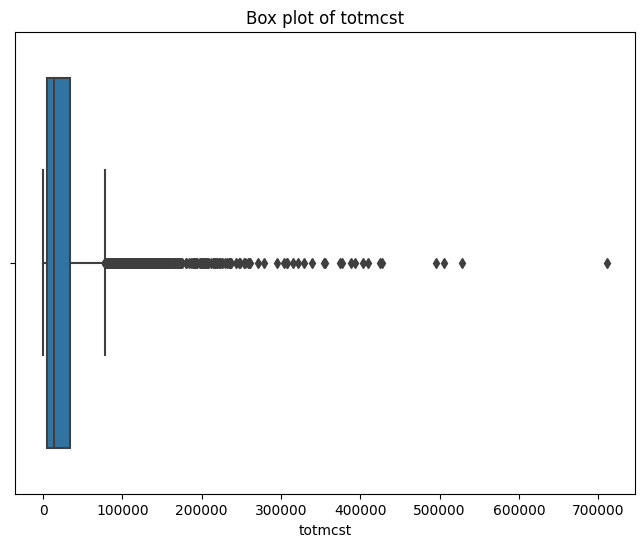

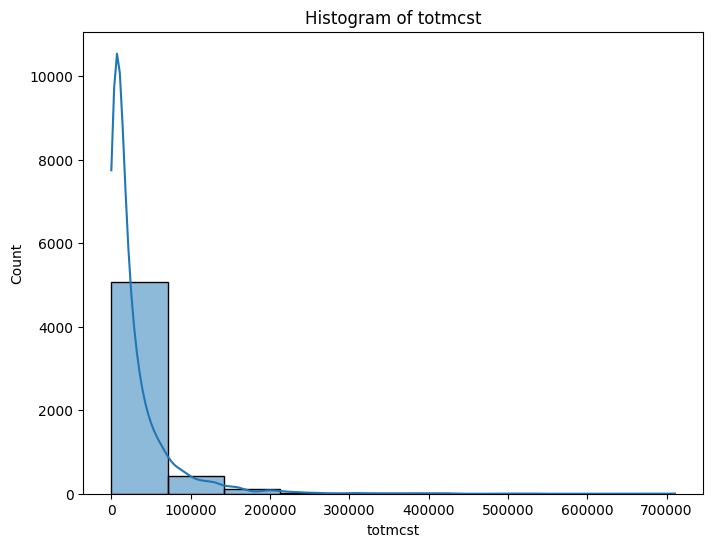

In [91]:
data_exploration(data,'totmcst')

Counts and percentages of unique values in income:

            Count  Percentage
income                       
under $11k   2855   46.627470
$11-$25k     1527   24.938756
$25-$50k     1057   17.262780
>$50k         684   11.170995


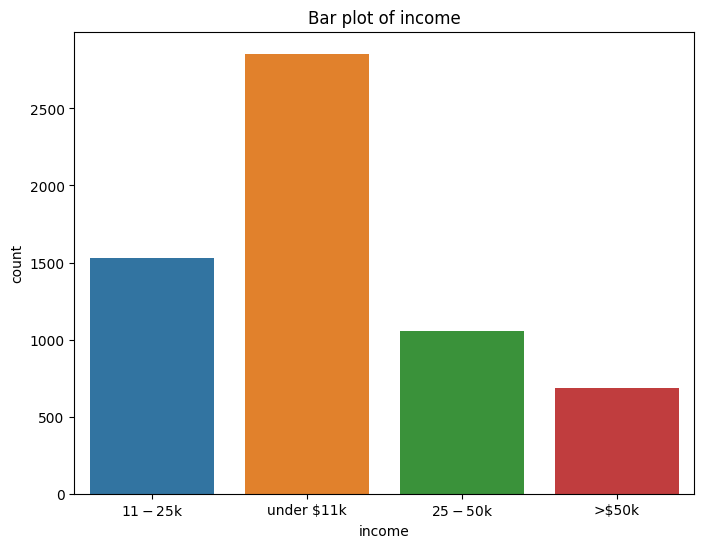

In [92]:
data_exploration(data,'income')

Mean of edu: 11.75
Standard deviation of edu: 3.45
Number of outliers in edu: 6
Outliers values:
[30. 27. 31. 27. 30. 28.]


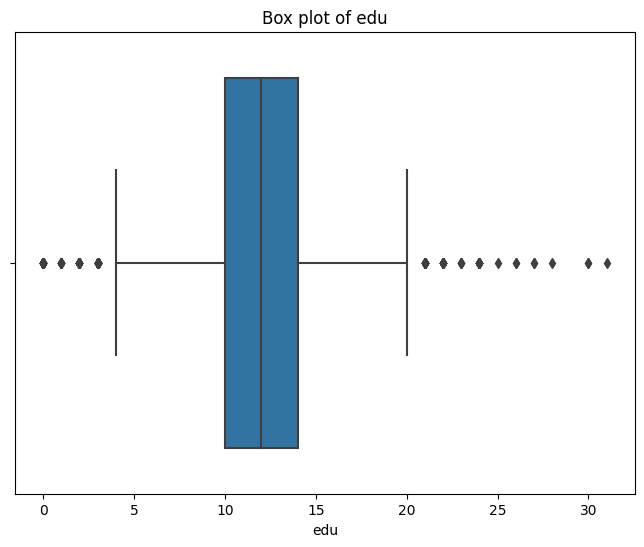

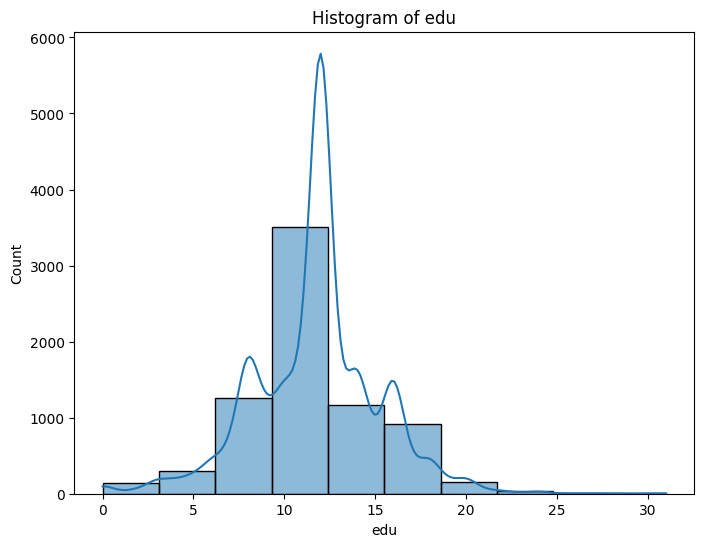

In [93]:
data_exploration(data,'edu')

Mean of prg2m: 0.62
Standard deviation of prg2m: 0.30
Number of outliers in prg2m: 0
Outliers values:
[]


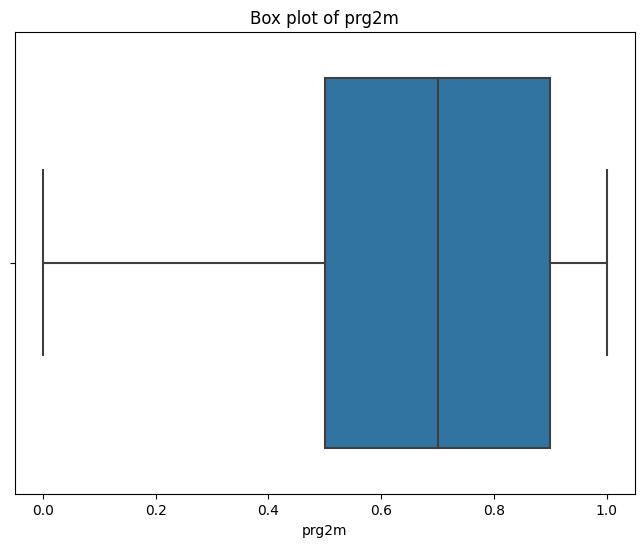

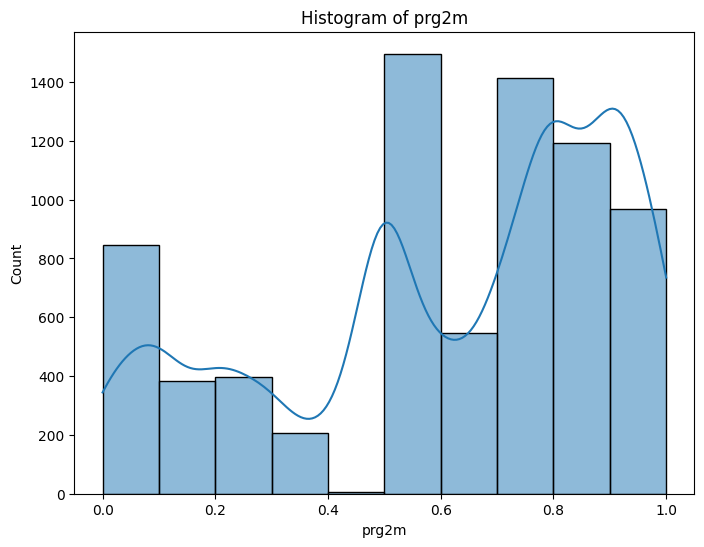

In [94]:
data_exploration(data,'prg2m')

Mean of prg6m: 0.50
Standard deviation of prg6m: 0.30
Number of outliers in prg6m: 0
Outliers values:
[]


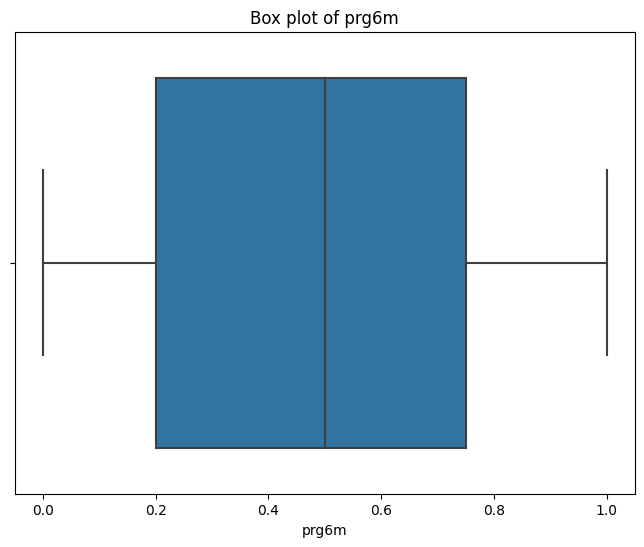

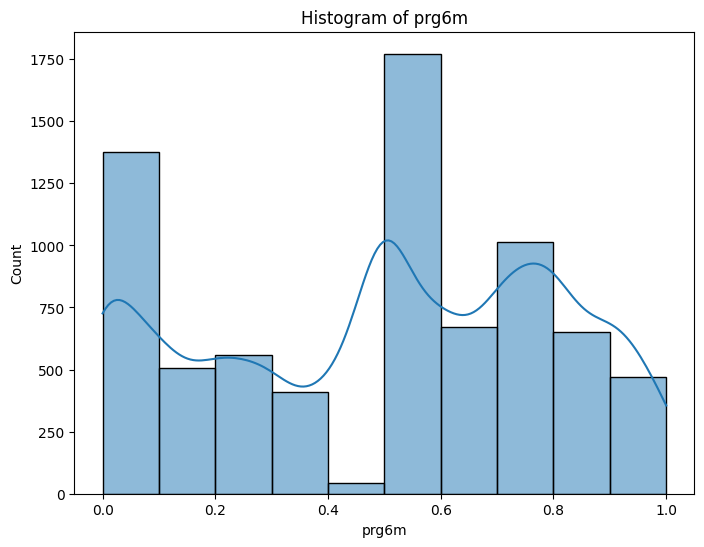

In [95]:
data_exploration(data,'prg6m')

Mean of pafi: 239.53
Standard deviation of pafi: 109.67
Number of outliers in pafi: 5
Outliers values:
[763.25  819.    869.375 890.375 795.125]


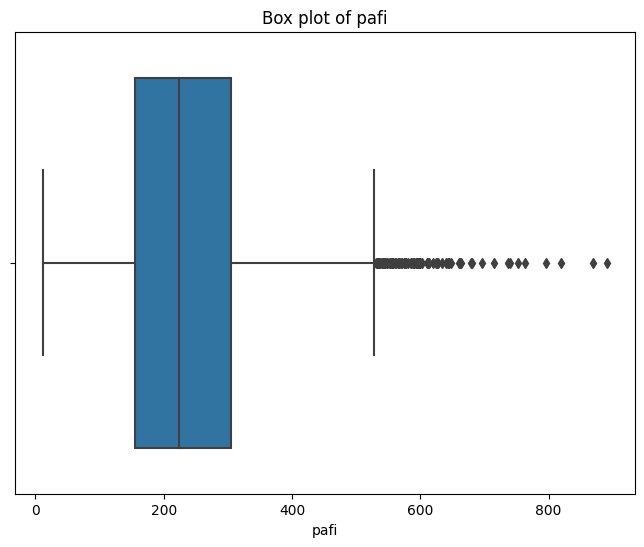

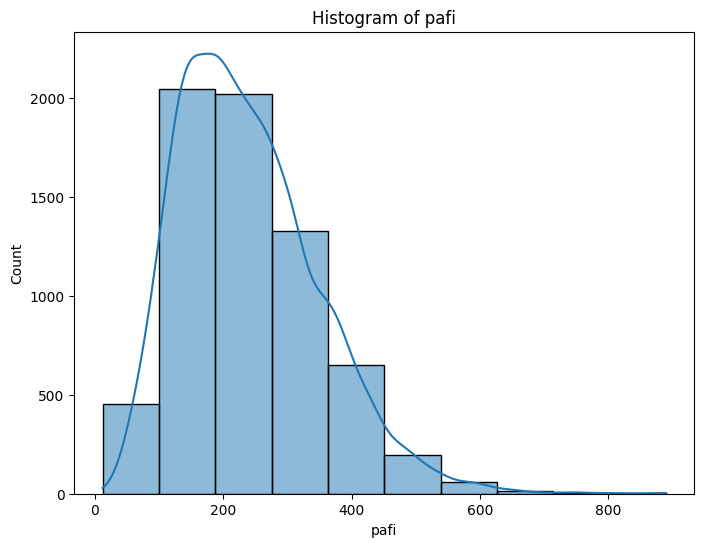

In [96]:
data_exploration(data,'pafi')

In [ ]:
data_exploration(data,'alb')

Mean of bili: 2.55
Standard deviation of bili: 5.32
Number of outliers in bili: 593
Outliers values:
[ 6.09960938 14.         12.7988281   6.79980469 23.5976562   7.
 31.3984375  13.0996094  13.          6.59960938 21.6992188  11.0996094
 31.         10.5        10.8984375   7.79980469 27.5        17.796875
 10.5        32.3984375   6.09960938  7.09960938  9.         10.1992188
  9.          7.69921875 16.796875   19.8984375  12.0996094  16.3984375
  7.5        16.8984375  38.3984375  54.296875   14.1992188  13.7988281
 10.5996094   6.09960938  6.19921875 35.         31.5976562  11.0996094
 23.1992188  11.6992188   9.59960938 16.296875    8.29882812 34.5
  8.3984375   9.8984375  44.3984375  51.296875    6.5        11.8984375
 35.6953125  13.6992188   7.5         8.          7.59960938 38.3984375
 12.5996094  19.796875    6.89941406  6.09960938 24.0976562  24.1992188
 11.5        21.         18.5976562   6.29980469  9.29882812  7.09960938
 18.5976562  10.1992188  19.296875    9.5       

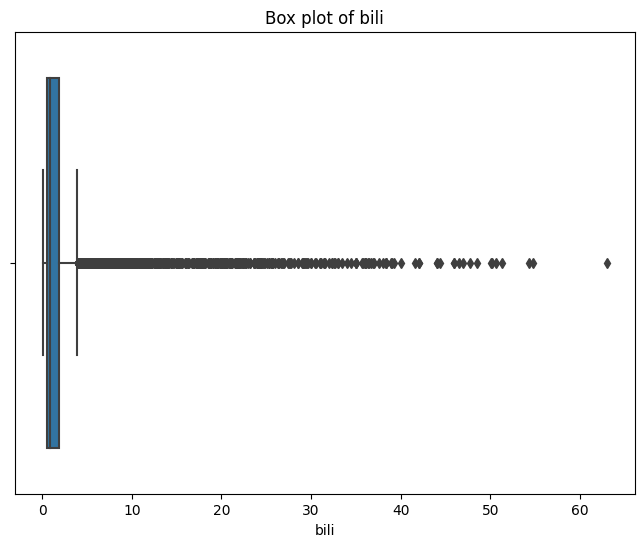

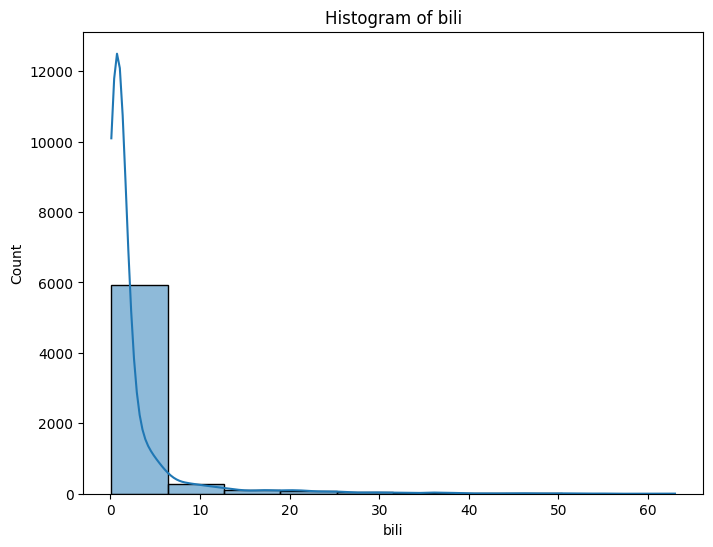

In [86]:
data_exploration(data,'bili')

**bili variable evaluation** 

- Biliruben level (liver funtion) could be vital 

Mean of ph: 7.42
Standard deviation of ph: 0.08
Number of outliers in ph: 37
Outliers values:
[7.069336 7.079102 7.069336 6.939453 7.089844 7.069336 7.089844 7.109375
 7.109375 6.959961 7.089844 6.959961 6.969727 7.089844 7.069336 7.109375
 7.099609 7.109375 7.069336 7.089844 6.90918  6.919922 7.05957  7.069336
 6.929688 6.989258 7.069336 6.969727 7.109375 7.069336 7.099609 7.019531
 7.029297 7.089844 7.05957  7.769531 6.829102]


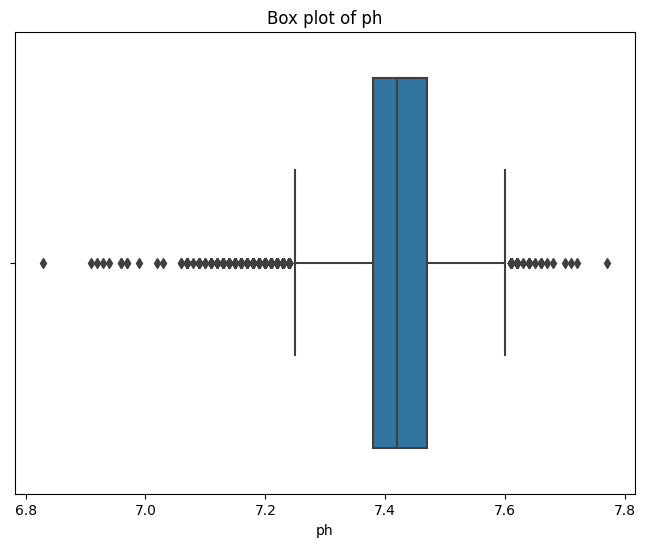

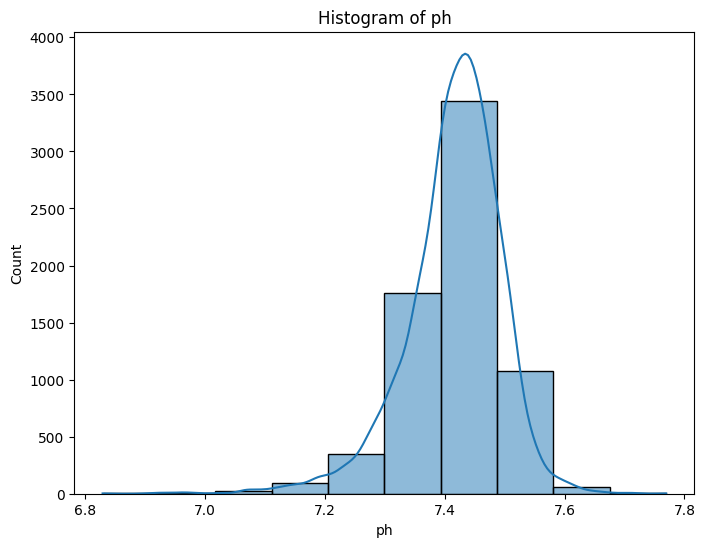

In [87]:
data_exploration(data,'ph')

**ph value evaluation** 
- Curve shows somewhat normal distribution 
- Extreme values could be genuine too 

Mean of glucose: 159.87
Standard deviation of glucose: 88.39
Number of outliers in glucose: 54
Outliers values:
[ 658.  841.  476.  508.  598.  584.  597.  617.  513.  462.  492.  648.
  468.  651.  502.  508.  719.  477.  547.  599.  943. 1092.  528.  537.
  498.  561.  668.  474.  520.  971.  687.  705.  536.  535.  507.  527.
  498.  446.  546.  512.  543.  661.  621.  611. 1051.  516.  551.  576.
  511.  478.  686.  463.  535.  446.]


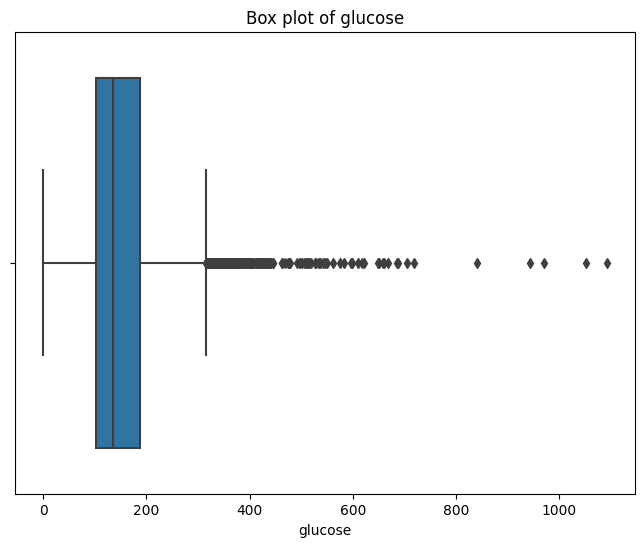

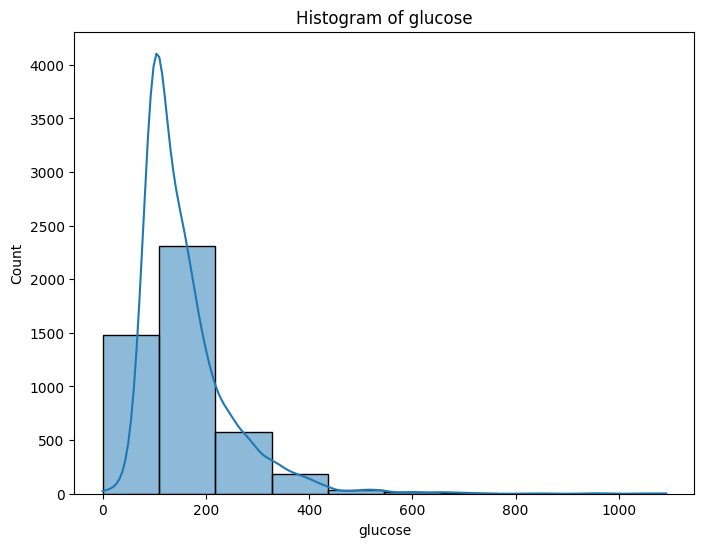

In [88]:
data_exploration(data,'glucose')

**Glucose variable evaluation** 
- Graph shows left-skewness 
- glucose level in adults could be genuine values

Mean of bun: 32.35
Standard deviation of bun: 26.79
Number of outliers in bun: 44
Outliers values:
[150. 131. 147. 136. 166. 130. 170. 130. 139. 147. 178. 129. 127. 138.
 146. 300. 174. 137. 128. 144. 149. 135. 127. 132. 142. 129. 143. 192.
 134. 142. 133. 134. 136. 136. 147. 148. 158. 148. 154. 158. 130. 171.
 154. 132.]


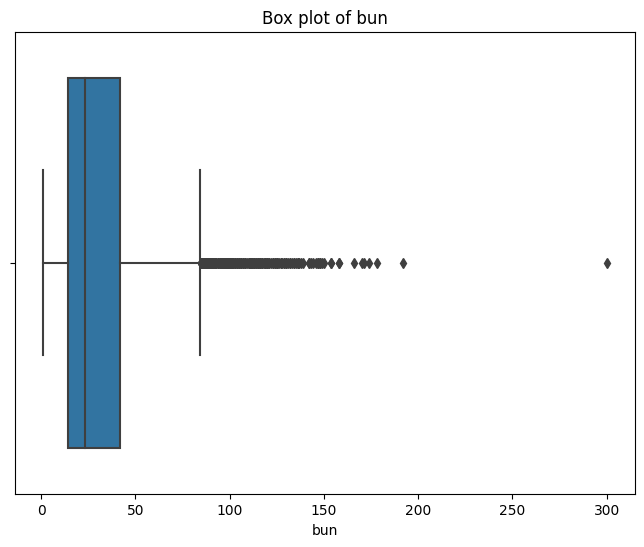

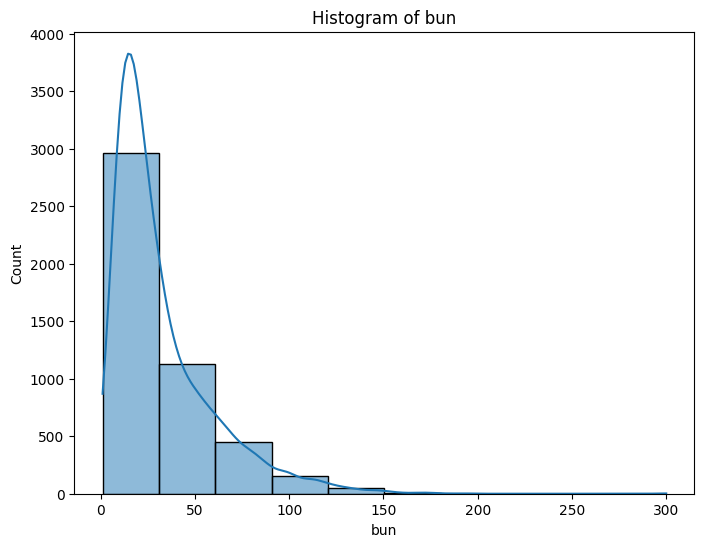

In [89]:
data_exploration(data,'bun')

**'bun' variable evaluation:** 
- Graph shows left-skewness 
- Blood-urine nitrogen level could be genuine values 

Mean of urine: 2191.55
Standard deviation of urine: 1455.25
Number of outliers in urine: 5
Outliers values:
[8550. 9000. 9000. 9000. 8600.]


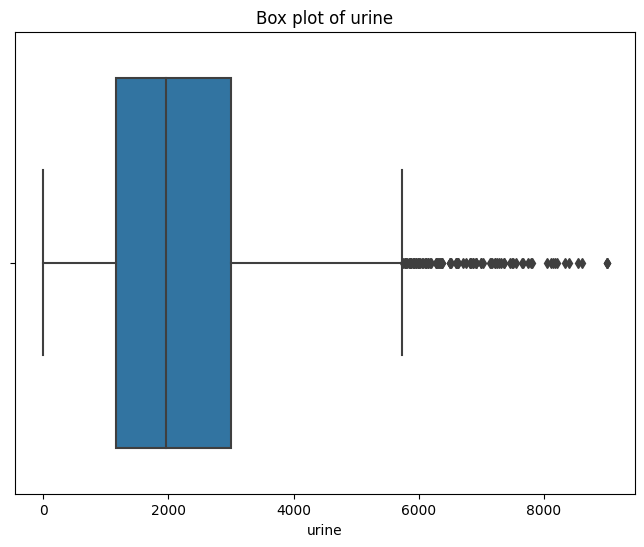

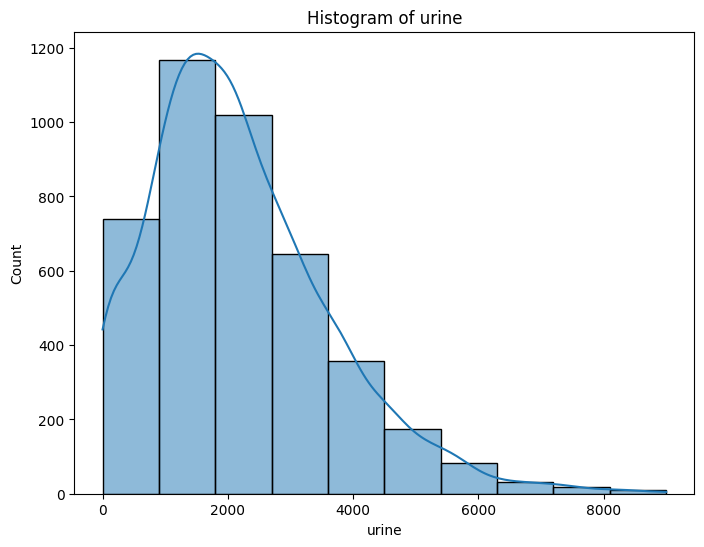

In [90]:
data_exploration(data,'urine')

**Urine Variable Evaluation:**

- Histogram shows left-skewed distribution. 

- Need to verify if outliers are genuine values or errors. (its a kidney function so it could be geuine values)


In [ ]:
data_exploration(data, 'adlp')

In [ ]:
data_exploration(data, 'adls')

In [ ]:
data_exploration(data,'sfdm2')